In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Objective - Based on AnnualIncome and SpendingScore, group customers into different clusters

In [5]:
df.shape

(200, 5)

In [7]:
df.columns = ['CID','Gender','Age','AnnInc','SScore']
df.head()

,CID,Gender,Age,AnnInc,SScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.isnull().sum()

CID       0
Gender    0
Age       0
AnnInc    0
SScore    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [15]:
x = df.iloc[:,-2:]
x.head()

,AnnInc,SScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
x.describe()

,AnnInc,SScore
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


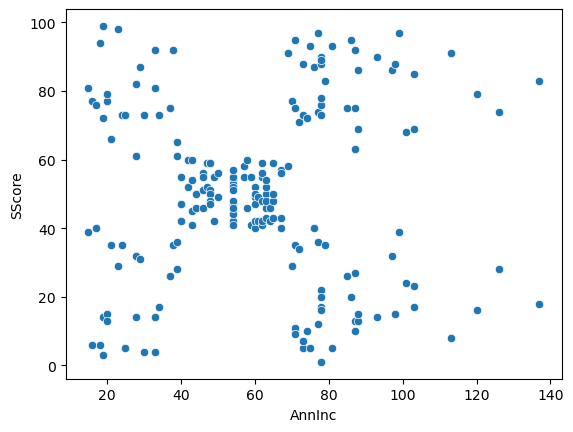

In [19]:
sns.scatterplot(data=x,x='AnnInc',y='SScore')
plt.show()

#### Elbow Method

In [21]:
from sklearn.cluster import KMeans

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# wcss = within cluster sum of squares
# As the num of clusters , wcss decreases

# model.inertia_ returns wcss

wcss = []
for i in range(1,21):    # i = 1,2,3....,20
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)
    
print('wcsss')
print(wcss)

wcsss
[269981.28, 183811.28277016422, 106348.37306211118, 73679.78903948836, 44448.45544793371, 38858.9599751439, 30259.657207285465, 29021.453935919155, 21850.16528258563, 25787.62304428802, 18371.563027943506, 17007.089385158262, 15302.111908354014, 14508.810566626355, 12147.132284382285, 11593.152358915595, 10206.41636978613, 10346.354116594906, 8948.147041847042, 8591.497857142856]


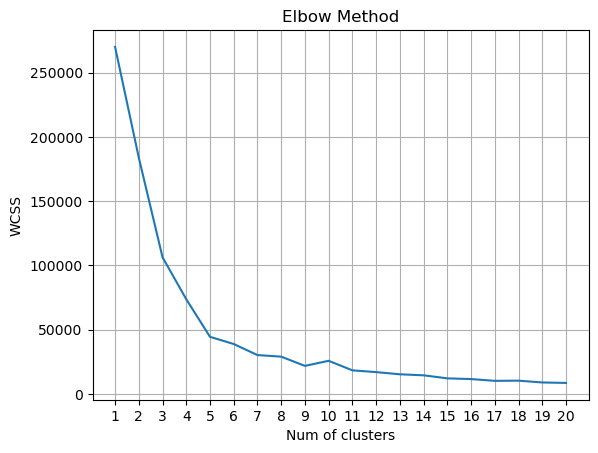

In [27]:
plt.plot(list(range(1,21)),wcss)
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(list(range(1,21)))
plt.grid()
plt.show()

#### Inference
1) Optimal number of clusters = 5

#### Applying KMeans at K = 5

In [29]:
k5 = KMeans(n_clusters=5) # init='k-means++'
k5.fit(x)

KMeans(n_clusters=5)

#### Generate Predictions

In [31]:
ypred_k5 = k5.predict(x)
print(len(ypred_k5))

200


In [33]:
df['Cls5'] = ypred_k5
df['Cls5'].value_counts()

Cls5
0    80
2    39
1    36
4    23
3    22
Name: count, dtype: int64

#### Final Cluster centroids

In [35]:
cent5 = k5.cluster_centers_
print(cent5)

[[55.0875     49.7125    ]
 [87.75       17.58333333]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


In [ ]:
# C0 - 25.72727273,  79.36363636 -  Low AnnInc and High SScore
# C1 - 88.2,         17.11428571 - High AnnInc and Low SScore
# C2 - 86.53846154, 82.12820513 -  High AnnInc and High SScore
# C3 - 55.2962963  49.51851852 -   Medium AnnInc and Medium SScore
# C4 - 26.30434783 20.91304348 -   Low AnnInc and Low SScore

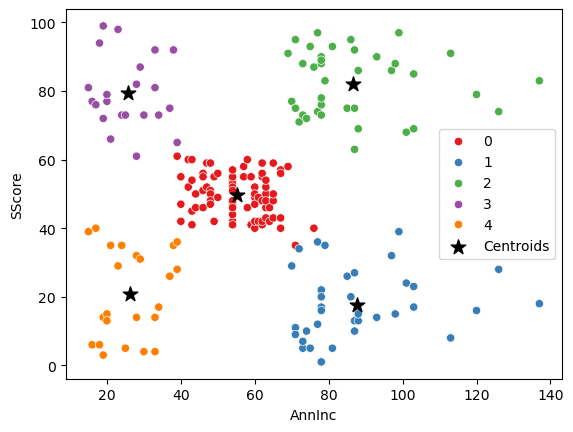

In [37]:
sns.scatterplot(data=df,x='AnnInc',y='SScore',hue='Cls5',palette='Set1')
plt.scatter(cent5[:,0],cent5[:,1],label='Centroids',marker='*',s=120,
            color='black')
plt.legend()
plt.show()

In [39]:
df.head()

,CID,Gender,Age,AnnInc,SScore,Cls5
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
